In [6]:
import warnings

import hypothesis.strategies as st
import numpy as np
import pytest
from hypothesis import given, assume, reproduce_failure

#import strategies as abtem_st
from abtem import GridScan, WavesDetector
from abtem.core.backend import cp
#from utils import gpu, assert_array_matches_device
import abtem

In [108]:
s_matrix = abtem.SMatrix(energy=200e3, semiangle_cutoff=20, extent=10, gpts=64)
s_matrix = abtem.SMatrix(extent=(10, 10), energy=200000.0, gpts=(200, 200), semiangle_cutoff=20.0, interpolation=(2,2))

In [114]:

s_matrix = s_matrix.round_gpts_to_interpolation()
probe = s_matrix.dummy_probes()

s_matrix_diffraction_patterns = s_matrix.reduce(lazy=True).diffraction_patterns(
    max_angle=None
).to_cpu()
probe_diffraction_patterns = probe.build(lazy=True).diffraction_patterns(
    max_angle=None
).to_cpu()


In [107]:
probe.extent

(2.5, 5.0)

[########################################] | 100% Completed |  0.4s


(<Figure size 432x288 with 2 Axes>,
 <Axes:xlabel='kx [1 / Å]', ylabel='ky [1 / Å]'>)

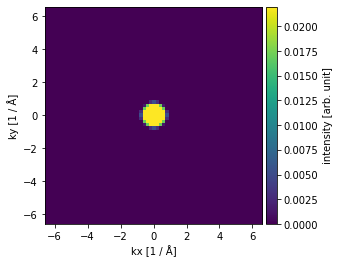

In [115]:
s_matrix_diffraction_patterns.show(cbar=True)

[########################################] | 100% Completed |  0.1s


(<Figure size 432x288 with 2 Axes>,
 <Axes:xlabel='kx [1 / Å]', ylabel='ky [1 / Å]'>)

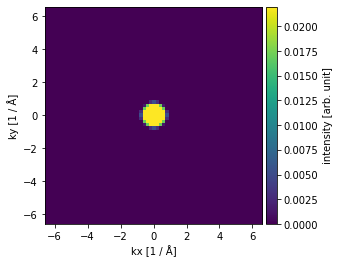

In [116]:
probe_diffraction_patterns.show(cbar=True)

[########################################] | 100% Completed |  0.4s


(<Figure size 432x288 with 2 Axes>,
 <Axes:xlabel='kx [1 / Å]', ylabel='ky [1 / Å]'>)

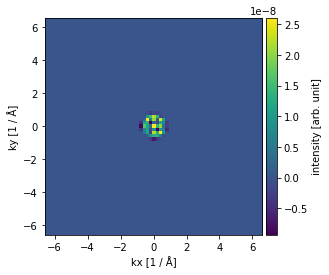

In [117]:
(probe_diffraction_patterns-s_matrix_diffraction_patterns).show(cbar=True)